<a href="https://colab.research.google.com/github/viola1106/Python_Note/blob/main/CNN(%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN(Convolutional Neural Network)卷積神經網路

In [1]:
import pandas as pd
import keras
from keras.utils import to_categorical

In [2]:
keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [4]:
print('x_Train.shape:', x_Train.shape)
print('y_Train.shape:', y_Train.shape)

x_Train.shape: (60000, 28, 28)
y_Train.shape: (60000,)


In [5]:
# 資料視覺化
import matplotlib.pyplot as plt

def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2, 2)
  plt.imshow(image, cmap='binary')
  plt.show()


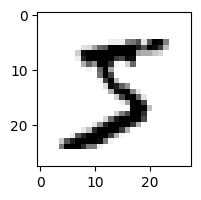

In [6]:
plot_image(x_Train[0])

In [7]:
# 增加顏色維度: 彩色RGB維度是3，黑白是1
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')
x_Train4D.shape

(60000, 28, 28, 1)

In [8]:
# 01縮放(數值縮小到0~1之間): 灰階圖片的數值為0~255之間，將數值縮放到0~1之間
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

# 對類別做one-hot encoding處理: 原本的類別是0~8的數字，轉換之後才可以在model用
y_TrainOnehot = to_categorical(y_Train)
y_TestOnehot = to_categorical(y_Test)

### CNN模型

In [9]:
from keras.models import Sequential  # 載入model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  # 各種層

model = Sequential()

In [10]:
#
model.add(Conv2D(filters=16,  # 16層(feature detector)
        kernel_size=(5, 5),  # 矩陣大小
        padding='same',  # 超出邊界時補值
        input_shape=(28, 28, 1),  # input大小
        activation='relu'# 激活函數
        ))

In [11]:
#
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#
model.add(Conv2D(filters=16,  # 16層(feature detector)
        kernel_size=(5, 5),  # 矩陣大小
        padding='same',  # 超出邊界時補值
        activation='relu'# 激活函數
        ))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
# 層與層之間做drop避免overfitting
model.add(Dropout(0.25))

In [15]:
# 平坦化
model.add(Flatten())
# Neural Network
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10:總共10個類別, softmax:機率預測函數


In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        6416      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        6416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 16)          0

### 訓練模型

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
train_history = model.fit(x=x_Train4D_normalize,
              y=y_TrainOnehot,
              validation_split=0.2,
              epochs=20,
              batch_size=300,
              verbose=2)

Epoch 1/20
160/160 - 69s - loss: 0.5479 - accuracy: 0.8229 - val_loss: 0.1039 - val_accuracy: 0.9672 - 69s/epoch - 430ms/step
Epoch 2/20
160/160 - 67s - loss: 0.1429 - accuracy: 0.9561 - val_loss: 0.0707 - val_accuracy: 0.9788 - 67s/epoch - 416ms/step
Epoch 3/20
160/160 - 65s - loss: 0.1070 - accuracy: 0.9674 - val_loss: 0.0620 - val_accuracy: 0.9813 - 65s/epoch - 405ms/step
Epoch 4/20
160/160 - 66s - loss: 0.0886 - accuracy: 0.9724 - val_loss: 0.0524 - val_accuracy: 0.9843 - 66s/epoch - 414ms/step
Epoch 5/20
160/160 - 65s - loss: 0.0759 - accuracy: 0.9770 - val_loss: 0.0466 - val_accuracy: 0.9858 - 65s/epoch - 407ms/step
Epoch 6/20
160/160 - 67s - loss: 0.0666 - accuracy: 0.9799 - val_loss: 0.0473 - val_accuracy: 0.9861 - 67s/epoch - 422ms/step
Epoch 7/20
160/160 - 66s - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0377 - val_accuracy: 0.9888 - 66s/epoch - 413ms/step
Epoch 8/20
160/160 - 68s - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0401 - val_accuracy: 0.9879 - 68s/epoch - 427

CPU: 使用22m6s完成   
達到99%正確度